In [1]:
import sympy as sp
sp.init_printing()

### #1
В сумке Кати N похожих ключей; только один из них подходит к двери от дома. Когда Катя вечером приходит домой, она наугад достаёт ключ из сумки и пытается открыть им дверь. Если ключ не подходит, она кладёт его обратно в сумку и снова достаёт наугад следующий. Каким законом задаётся распределение номера попытки X, с которой Кате удаётся открыть дверь?

In [2]:
i = sp.symbols('i')
N, n, k = sp.symbols('N n k')

In [3]:
1/N * (1 - 1/N)**(k-1)

Геометрическое распределение

---

### #2

Представим, что у нас есть данные $X_1,\dots{},X_n$ за n дней о том, с какой попытки Кате удалось открыть дверь.

Запишите функцию правдоподобия такой выборки и возьмите от неё логарифм.

Какое выражение у вас получилось?

---

In [4]:
# Что бы получилось использовать $X_i$ как в символьных
# выражениях, так и при численном решении
# определяем функцию X(i)
class X(sp.Function):

    X_DATA = [8, 12, 7, 6, 12]

    @classmethod
    def eval(cls, idx):
        if idx.is_Number:
            if idx >= 0 and idx < len(X.X_DATA):
                return X.X_DATA[idx]
            else:
                return sp.S.Zero

    def _eval_is_real(self):
        return self.args[0].is_real

In [5]:
expr = 1/N * (1 - 1/N)**(X(i) - 1)
expr

Функция правдоподобия тогда получается:

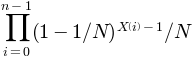

In [6]:
prod = sp.Product(expr, (i, 0, n - 1))
prod

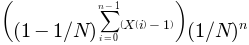

In [7]:
subs_prod = prod.doit()
subs_prod

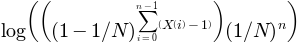

In [8]:
ln_prod = sp.ln(subs_prod)
ln_prod

Заставить sympy нормально развернуть произведение до $n \ln{ \frac{1}{n} } + (\Sigma{X_i} - n) \ln{1-\frac{1}{N}}$ у меня не получилось, но на конечный результат это не влияет.

---

## #3
За последние пять дней Кате удавалось открыть дверь с восьмой, двенадцатой, седьмой, шестой и снова двенадцатой попыток; давайте найдём оценку максимального правдоподобия для N. Подставьте эти числа в выражение для логарифма правдоподобия, продифференцируйте его по N и приравняйте к нулю. Из полученного уравнения выразите N. Итак, $\hat{N}_{ОМП}=$

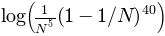

In [9]:
subs_ln_prod = ln_prod.subs({n: 5}).doit()
subs_ln_prod

subs - подставляет количество дней $n$, а doit() вычисляет сумму $\Sigma{} X_i$.

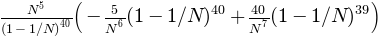

In [10]:
diff_eq = sp.diff(subs_ln_prod, N)
diff_eq

приравниваем производную к 0

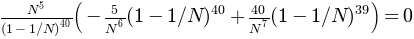

In [11]:
loss_eq = sp.Eq(diff_eq, 0)
loss_eq

и решаем относительно N

In [12]:
sp.solve(loss_eq, N)